In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
% matplotlib inline 

### 1. {x_n}:RW and {y_n}RW

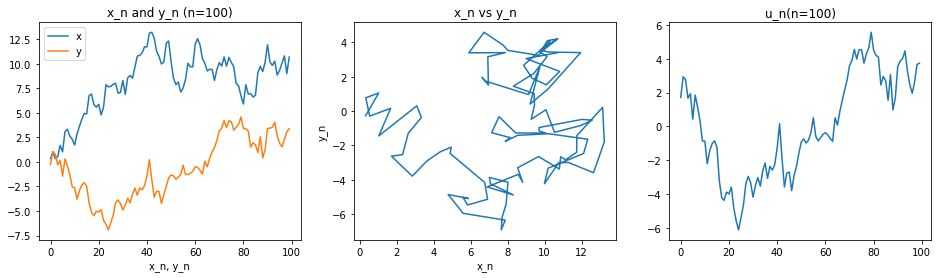

In [2]:
#XX generate {x} and {y}, which are RW
x=[]
y=[]
epsilon_x = np.random.randn(100)
epsilon_y=np.random.randn(100)
x.append(epsilon_x[0])
y.append(epsilon_y[0])
for t in np.arange(1,100):
    x.append(x[t-1]+epsilon_x[t])
    y.append(y[t-1]+ epsilon_y[t])
X=sm.add_constant(x)
ols=OLS(y,X)
results=ols.fit()


# visualise
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.plot(x,label='x')  # label argument is needed for legends
plt.plot(y,label='y')
plt.legend()
plt.title('x_n and y_n (n=100)')
plt.xlabel('x_n, y_n')

plt.subplot(132)
plt.plot(x,y)
plt.xlabel('x_n')
plt.ylabel('y_n')
plt.title('x_n vs y_n')

plt.subplot(133)
plt.plot(results.resid)
plt.title('u_n(n=100)')

In [74]:
# monte carlo sim 
n=100

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(x[t-1]+epsilon_x[t])
        y.append(y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)
    
# vidualilse
f1=plt.figure(1,figsize=(16,2.5))

plt.subplot(131)
plt.hist(coef,bins=100)     # `normed =True` normalised y-axis for the integer of hist to sum up 1. If you want to make y-axis in percentage form, do it manually!1
plt.xlim(-3,3)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(132)
plt.hist(t_stat,bins=100)
plt.xlim(-100,100)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(133)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)

plt.close()   # dont show figure

In [75]:
n=500

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(x[t-1]+epsilon_x[t])
        y.append(y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)

    
# vidualilse
f2=plt.figure(1,figsize=(16,2.5))

plt.subplot(131)
plt.hist(coef,bins=100)
plt.xlim(-3,3)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(132)
plt.hist(t_stat,bins=100)
plt.xlim(-100,100)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(133)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)

plt.close()

In [76]:
n=1000

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(x[t-1]+epsilon_x[t])
        y.append(y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)
# vidualilse
f3=plt.figure(1,figsize=(16,2.5))

plt.subplot(131)
plt.hist(coef,bins=100)
plt.xlim(-3,3)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(132)
plt.hist(t_stat,bins=100)
plt.xlim(-100,100)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(133)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)

plt.close()

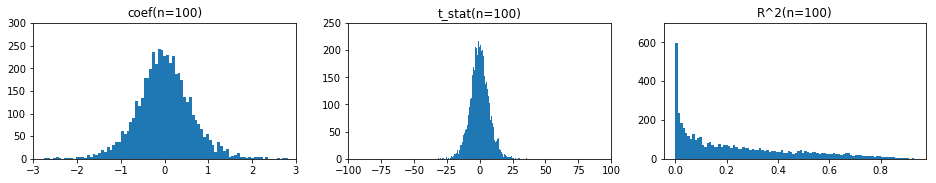

In [77]:
f1

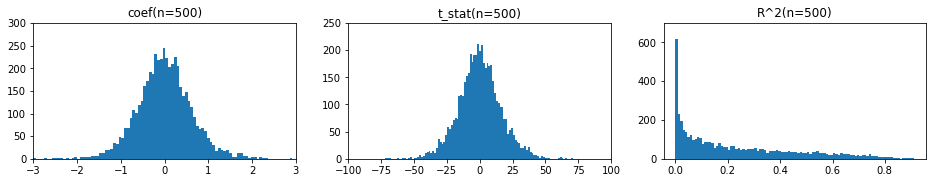

In [78]:
f2

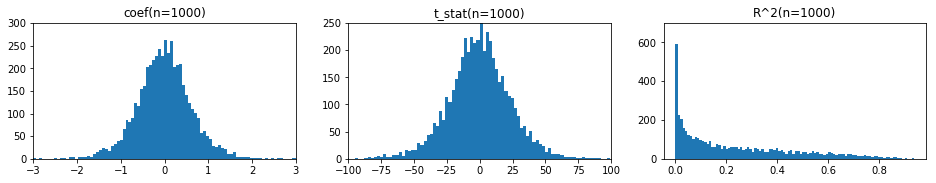

In [79]:
f3

### 2. {x_n}:RW-D and {y_n}:RW

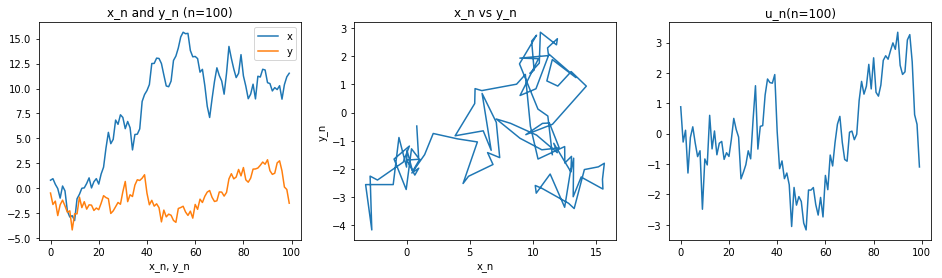

In [30]:
x=[]
y=[]
epsilon_x = np.random.randn(100)
epsilon_y=np.random.randn(100)
x.append(epsilon_x[0])
y.append(epsilon_y[0])
for t in np.arange(1,100):
    x.append(0.2+x[t-1]+epsilon_x[t])
    y.append(y[t-1]+ epsilon_y[t])
X=sm.add_constant(x)
ols=OLS(y,X)
results=ols.fit()


# visualise
plt.figure(figsize=(16,4))
plt.subplot(131)
plt.plot(x,label='x')  # label argument is needed for legends
plt.plot(y,label='y')
plt.legend()
plt.title('x_n and y_n (n=100)')
plt.xlabel('x_n, y_n')

plt.subplot(132)
plt.plot(x,y)
plt.xlabel('x_n')
plt.ylabel('y_n')
plt.title('x_n vs y_n')

plt.subplot(133)
plt.plot(results.resid)
plt.title('u_n(n=100)')

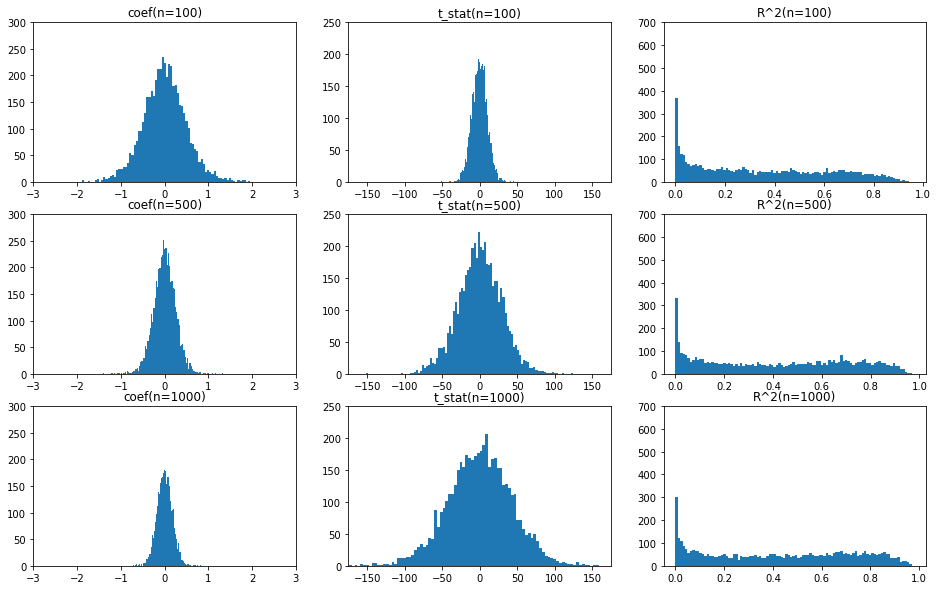

In [53]:
# monte carlo sim 
n=100

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(0.2+x[t-1]+epsilon_x[t])
        y.append(y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)
    
# vidualilse
f2=plt.figure(2,figsize=(16,10))

plt.subplot(331)
plt.hist(coef,bins=100)
plt.xlim(-3,3)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(332)
plt.hist(t_stat,bins=100)
plt.xlim(-175,175)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(333)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)


n=500

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(0.2+x[t-1]+epsilon_x[t])
        y.append(y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)

    
# vidualilse

plt.subplot(334)
plt.hist(coef,bins=100)
plt.xlim(-3,3)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(335)
plt.hist(t_stat,bins=100)
plt.xlim(-175,175)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(336)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)


n=1000

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(0.2+x[t-1]+epsilon_x[t])
        y.append(y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)
# vidualilse
plt.subplot(337)
plt.hist(coef,bins=100)
plt.xlim(-3,3)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(338)
plt.hist(t_stat,bins=100)
plt.xlim(-175,175)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(339)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)


### {x_n}: RW, {y_n} RW-D

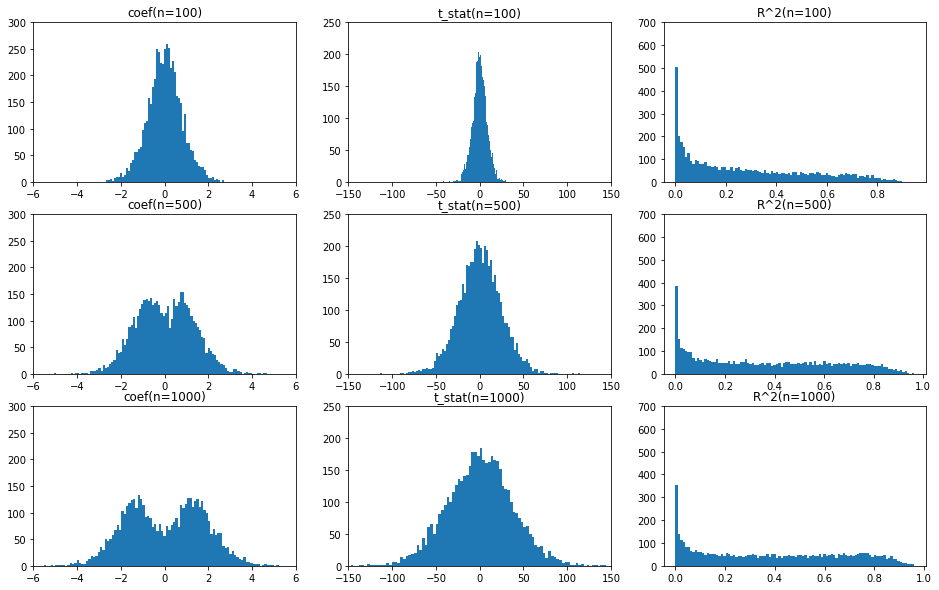

In [54]:
# monte carlo sim 
n=100

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(x[t-1]+epsilon_x[t])
        y.append(0.1+y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)
    
# vidualilse
f1=plt.figure(1,figsize=(16,10))

plt.subplot(331)
plt.hist(coef,bins=100)
plt.xlim(-6,6)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(332)
plt.hist(t_stat,bins=100)
plt.xlim(-150,150)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(333)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)



n=500

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(x[t-1]+epsilon_x[t])
        y.append(0.1+y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)

    
# vidualilse

plt.subplot(334)
plt.hist(coef,bins=100)
plt.xlim(-6,6)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(335)
plt.hist(t_stat,bins=100)
plt.xlim(-150,150)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(336)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)



n=1000

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(x[t-1]+epsilon_x[t])
        y.append(0.1+y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)
# vidualilse

plt.subplot(337)
plt.hist(coef,bins=100)
plt.xlim(-6,6)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(338)
plt.hist(t_stat,bins=100)
plt.xlim(-150,150)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(339)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)

### {x_n}:RW-D, {y_n}:RW-D

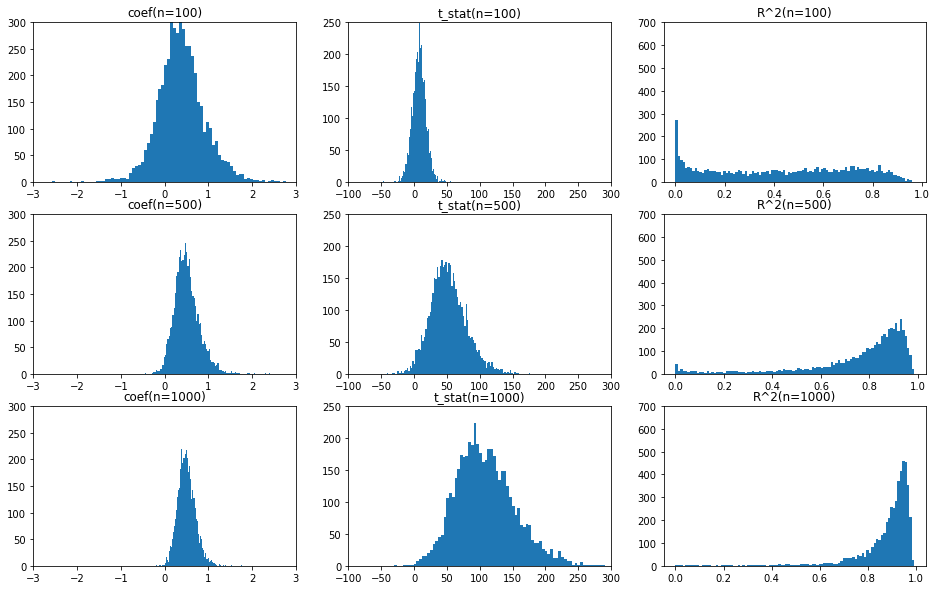

In [49]:
# monte carlo sim 
n=100

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(0.2+x[t-1]+epsilon_x[t])
        y.append(0.1+y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)
    
# vidualilse
f1=plt.figure(1,figsize=(16,10))

plt.subplot(331)
plt.hist(coef,bins=100)
plt.xlim(-3,3)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(332)
plt.hist(t_stat,bins=100)
plt.xlim(-100,300)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(333)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)



n=500

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(0.2+x[t-1]+epsilon_x[t])
        y.append(0.1+y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)

    
# vidualilse

plt.subplot(334)
plt.hist(coef,bins=100)
plt.xlim(-3,3)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(335)
plt.hist(t_stat,bins=100)
plt.xlim(-100,300)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(336)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)


n=1000

coef=[]
t_stat=[]
Rsq=[]

for J in np.arange(5000):
    #XX generate {x} and {y}, which are RW
    x=[]
    y=[]
    epsilon_x = np.random.randn(n)
    epsilon_y=np.random.randn(n)
    x.append(epsilon_x[0])
    y.append(epsilon_y[0])
    
    for t in np.arange(1,n):
        x.append(0.2+x[t-1]+epsilon_x[t])
        y.append(0.1+y[t-1]+ epsilon_y[t])

    x=pd.DataFrame(x)  # x and y needs to be DF for LinearModel() in sklearn (in statsmodels, its not necesarry)
    y=pd.DataFrame(y)  # x.shape = (100,1)

    X=sm.add_constant(x)  # OLS() doesnt have intercept by default
    ols=OLS(y,X)
    results=ols.fit()
    coef.append(results.params[0])
    t_stat.append(results.tvalues[0])
    Rsq.append(results.rsquared)
# vidualilse

plt.subplot(337)
plt.hist(coef,bins=100)
plt.xlim(-3,3)
plt.ylim(0,300)
plt.title('coef(n=%s)' %n)

plt.subplot(338)
plt.hist(t_stat,bins=100)
plt.xlim(-100,300)
plt.ylim(0,250)
plt.title('t_stat(n=%s)'%n)

plt.subplot(339)
plt.hist(Rsq,bins=100)
plt.ylim(0,700)
plt.title('R^2(n=%s)' %n)